In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [29]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

x_train = tf.gather(x_train, shuffled_indices)
y_train = tf.gather(y_train, shuffled_indices)

In [30]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 99710 (389.49 KB)
Trainable params: 99710 (389.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [32]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [33]:
x_train = x_train[:8000]
y_train = y_train[:8000]

In [21]:
if tf.config.list_physical_devices('GPU'):
    print("Training runs on GPU")
elif(tf.config.list_physical_devices('CPU')):
    print("Training runs on CPU")

print(f'Number of training samples: {len(x_train)}')
print(model.summary())
start_time = time.time()
model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)
end_time = time.time()

total_time = end_time - start_time
print(f'Total training time: {total_time} seconds')

Training runs on CPU
Number of training samples: 8000
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99710 (389.49 KB)
Trainable params: 99710 (389.49 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________

In [22]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [23]:
probability_model(np.array([x_test[1]]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674]],
      dtype=float32)>

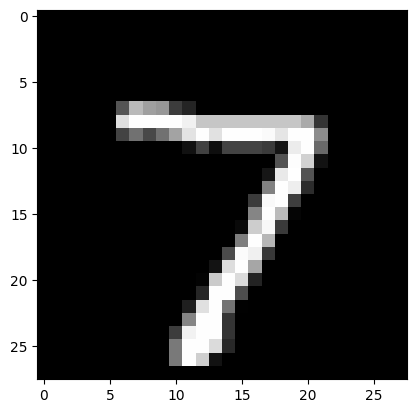

In [24]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [25]:
model.save('model.h5');

In [27]:
tf.saved_model.save(model, 'model-v3')

INFO:tensorflow:Assets written to: model-v3/assets


INFO:tensorflow:Assets written to: model-v3/assets
